# SED CA3 w/ Machine Learning and `sklearn`

In [2]:
import pandas as pd
import matplotlib.pylab as plt

<AxesSubplot:title={'center':'CA3 SED'}, xlabel='Frequency (GHz)', ylabel='Flux (mJy/beam)'>

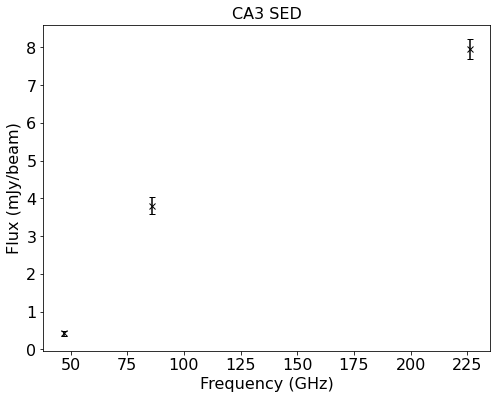

In [4]:
df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/hiiregion_W51_CA3.csv')  

def SED_plot():
    fontsize = 16
    fig, ax = plt.subplots(figsize=(8,6))
    plt.title("CA3 SED", fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xlabel("Frequency (GHz)", fontsize=fontsize)
    ax.set_ylabel("Flux (mJy/beam)", fontsize=fontsize)
    ax.errorbar(df.mu, df.amp, yerr=df.amp_error, fmt='x', color="black", capsize=3)
    
    return ax

SED_plot()

In [20]:
import numpy as np
from scipy.constants import c

mu = df.mu.values
amp = df.amp.values

mu = [226, 86, 46.99]
amp = [7.95E+00, 3.81E+00, 4.27E-01]

mu = np.array(mu)
amp = np.array(amp)
#mu = mu.reshape(-1,1)

In [24]:
c = scipy.constants.c

amp1 = c*(mu**2)
amp2 = c*(mu**4)
amp3 = c*(mu**0)

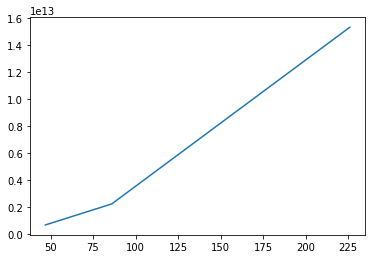

In [26]:
plt.plot(mu, amp1)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [45]:
import numpy as np

In [46]:
df=df.iloc[::-1]

In [1]:
mu = df.mu.values
amp = df.amp.values

mu = [226, 86, 46.99]
amp = [7.95E+00, 3.81E+00, 4.27E-01]

mu = np.array(mu)
amp = np.array(amp)
#mu = mu.reshape(-1,1)


NameError: name 'df' is not defined

In [54]:
poly = PolynomialFeatures(1)

In [55]:
mu_poly = poly.fit_transform(mu)
linreg = LinearRegression()
linreg.fit(mu_poly, amp)

LinearRegression()

In [56]:
poly.fit(mu_poly, amp)

PolynomialFeatures(degree=1)

<AxesSubplot:title={'center':'CA3 SED'}, xlabel='Frequency (GHz)', ylabel='Flux (mJy/beam)'>

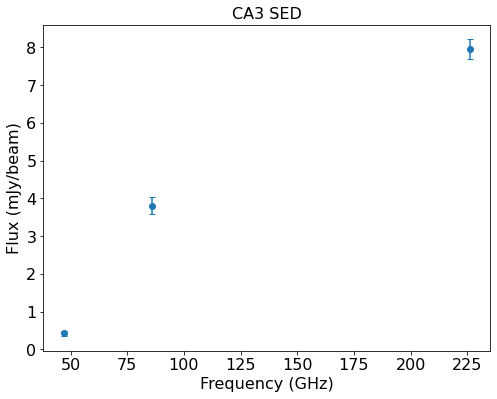

In [10]:
SED_plot()

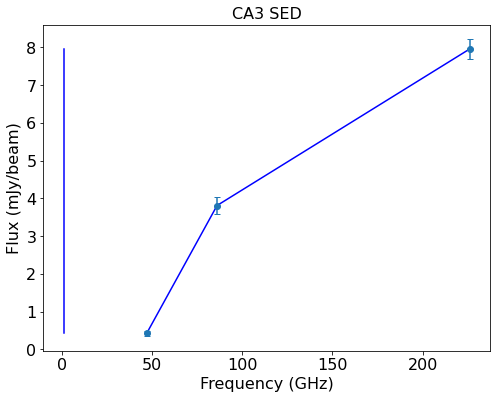

In [57]:
SED_plot()
plt.plot(mu_poly, amp, color='blue')

In [12]:
mu

array([[ 46.99],
       [ 86.  ],
       [226.  ]])

In [13]:
amp.reshape(-1,1)

array([[0.427],
       [3.81 ],
       [7.95 ]])

## Second method

In [14]:
#X is mu and y is flux
X = df.iloc[:, 0:1].values
y = df.iloc[:,1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

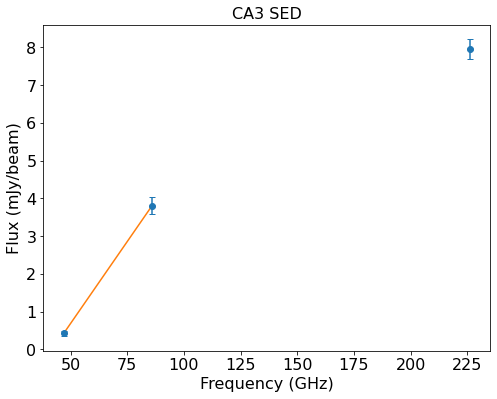

In [17]:
SED_plot()
plt.plot(X_train, y_train)

In [18]:
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree = 1)
X_polynom = polynom.fit_transform(X_train)

X_polynom

array([[ 1.  , 86.  ],
       [ 1.  , 46.99]])

In [19]:
PolyReg = LinearRegression()
PolyReg.fit(X_polynom, y_train)


LinearRegression()

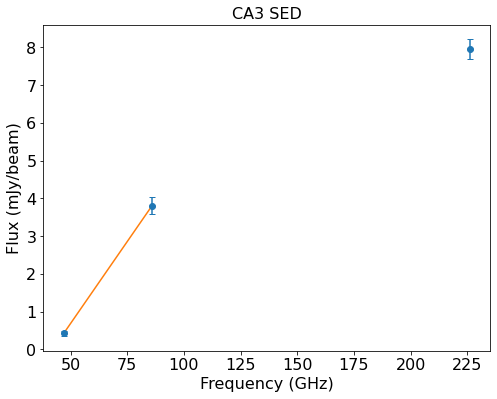

In [20]:
SED_plot()
plt.plot(X_train, PolyReg.predict(polynom.fit_transform(X_train)))

In [38]:
mu = df.mu.values
amp = df.amp.values

df.fillna(-99999, inplace=True)
df.dropna(inplace=True)

#not my code (https://github.com/GalagaBits/LectureNotes/blob/master/Lecture01_PolyReg/Lecture%2001%20-%20Review%20of%20some%20Linear%20Algebra%20and%20Introduction%20to%20Overfitting%20and%20Underfitting.ipynb)
def fitdata(x,t,M):
	'''fitdata(x,t,M): Fit a polynomial of order M to the data (x,t)'''	
	#This needs to be filled in
	X = np.array([x**m for m in range(M+1)]).T
	w = np.linalg.inv(X.T@X)@X.T@t
	return w

        
M = 2
w = fitdata(mu,amp,M)
xrange = np.arange(45,200,0.01)  #get equally spaced points in the xrange
X = np.array([xrange**m for m in range(w.size)]).T
esty = X@w #compute the predicted value

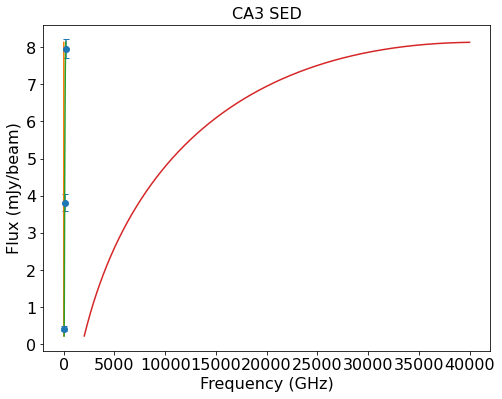

In [39]:
SED_plot()
plt.plot(X,esty)

In [23]:
mu

array([ 46.99,  86.  , 226.  ])

In [24]:
amp

array([0.427, 3.81 , 7.95 ])

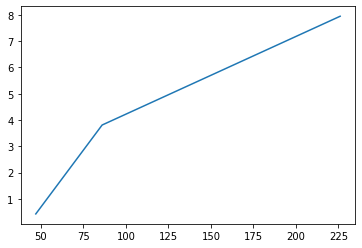

In [25]:
plt.plot(mu,amp)

[226.    86.    46.99]
[7.95  3.81  0.427]
[ 0.03871363 -0.57026927]
[-3.19255488e-04  1.29179141e-01 -4.93819252e+00]
[-1.06544084e-06  6.32271182e-05  9.28509325e-02 -3.96512792e+00]
[8.17901223 2.75910334 1.24888444]
[7.95  3.81  0.427]
0.935466247653969
0.9354662476539691
0.16351565037648427


/apps/python/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


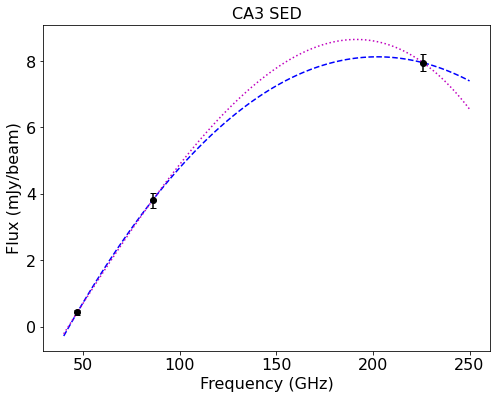

In [78]:
#not my code (https://www.youtube.com/watch?v=SSmpyoIdJTc)

import numpy as np
x = mu
y = amp
print(x)
print(y)

p1 = np.polyfit(x,y,1)
p2 = np.polyfit(x,y,2)
p3 = np.polyfit(x,y,3)
print(p1)
print(p2)
print(p3)

import matplotlib.pyplot as plt
SED_plot()
xp = np.linspace(40,250,100)
#plt.plot(xp,np.polyval(p1,xp),'r')
plt.plot(xp,np.polyval(p2,xp),'b--')
plt.plot(xp,np.polyval(p3,xp),'m:')
yfit = p1[0] * x + p1[1]
yresid= y - yfit
SSresid = np.sum(yresid**2)
SStotal = len(y) * np.var(y)
rsq = 1 - SSresid/SStotal
print(yfit)
print(y)
print(rsq)

from scipy.stats import linregress
slope,intercept,r_value,p_value,std_err = linregress(x,y)
print(r_value**2)
print(p_value)
plt.show()